# <h1><center>**911 Call Capstone Project......**</center></h1>

### The data contains the following fields:

1) [**lat** : String variable, Latitude](#0)<br>
2) [**lng** : String variable, Longitude](#2)<br>
3) [**desc** : String variable, Description of the Emergency Call](#4)<br>
4) [**zip** : String variable, Zipcode](#6)<br>
5) [**title** : String variable, Title](#8)<br>
6) [**timeStamp** : String variable, YYYY-MM-DD HH:MM:SS](#10)<br>
7) [**twp** : String variable, Township](#12)<br>
8) [**addr** : String variable, Address](#14)<br>
9) [**e** : String variable, Dummy variable (always 1)](#16)<br>

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

# **Data and Setup**

In [1]:
# Import Python Libraries.........

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# **Read in the CSV file as dataframe called data**

In [2]:
df = pd.read_csv('911 call capstone.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# **Replace the Column name**

In [4]:
df.rename(columns = {'twp': 'township'}, inplace = True)

# **Check the Head and Tail of Data**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,township,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,township,addr,e
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1


# **Basic Question:-**

### 1) What are the  top 5 zipcode for 911 calls?

In [7]:
df['zip'].value_counts().head(5)

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

### 2) What are the top 5 townships for 911 calls?

In [8]:
df['township'].value_counts().head(5)

township
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

### Take a look at the 'title' column how many unique title codes are there?

In [9]:
df['title'].nunique()

148

# **Creating  New Features**

### In the title column there are "Reasons/Departments" specified before the title code. These are EMS, Fire and Traffic.Use **.apply()** with a custom lambda exxpression to create a new column class "Reason" that contains this string value.

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

### What is the most common Reason for a 911 call based off of this new column?

In [11]:
df['Reason'].value_counts()

Reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

### Now use Seaborn to create a countplot of 911 calls by **Reason**.

<Axes: xlabel='Reason', ylabel='count'>

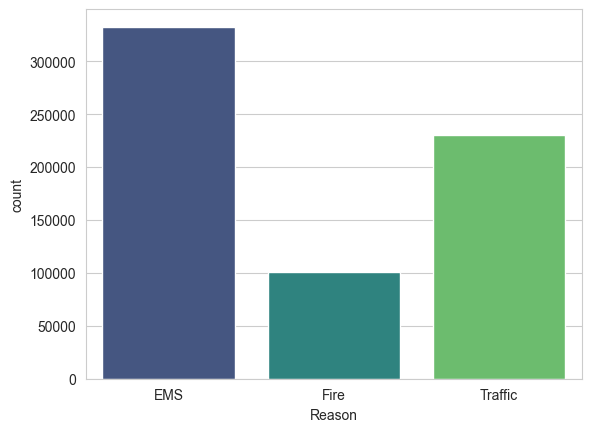

In [12]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

### Now let us begin to focus on time information. What is the data type of the objeccts in the timeStamp column?

In [13]:
type(df['timeStamp'].iloc[0])

str

### You should have seen that these timestampss are still string. Use pd.to_datetime tp convert the column from strings to DateTime objects.

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

### You can now grab specific attributes from a Datetime object by calling them.

You can use Jupyterls tab method to explore the various attributes you can call. Now that the timestamp column are actually Date Time object, use.  apply() to create 3 new columns called Hour,Month and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

### Notice how the Day of Week is an integer 0-6. Use the **.map()** with this dictionary to map the actual string names to the day of the week.

In [16]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [17]:
df['Day of Week'] = df['Day of Week']. map(dmap)

### Now use Seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

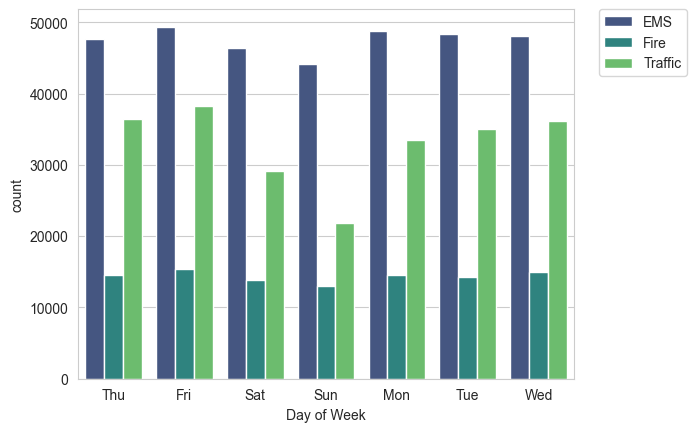

In [18]:
sns.countplot(x = 'Day of Week', data = df, hue = 'Reason', palette = 'viridis')

# To relocate the legend

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

### Now do the same for Months:

In [19]:
dmap = {0:'Jan', 1:'Feb', 2:'Mar', 3:'Apr', 4:'May', 5:'Jun', 6:'July', 7:'Aug', 8:'Sept', 9:'Oct', 10:'Nov', 11:'Dec'}

In [20]:
df['Month'] = df['Month']. map(dmap)

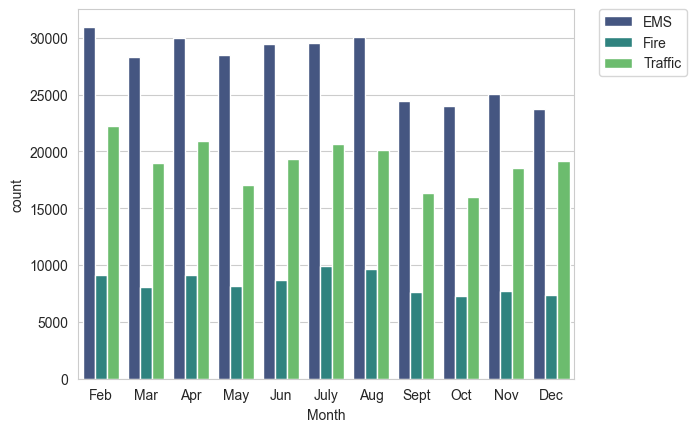

In [21]:
sns.countplot(x = 'Month', data = df, hue = 'Reason', palette = 'viridis')

# To relocate the legend

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

### You should have noticed it was missing Jan month, let's see if we can maybe fill in this information in another way possibly a simple line plot thaat fills in the missing months in order to do this we'll need to do some work with Pandas...

### Now create a groupby object caleed byMonth where you group the DataFrame by the month colimn and use the **.counts()** method for aggregation.Use the **.head()** method on this returned DataFrame.

In [22]:
byMonth = df.groupby('Month').count()

In [23]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,township,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
Apr,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
Aug,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
Dec,50182,50182,50182,44087,50182,50182,50157,50182,50182,50182,50182,50182
Feb,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
July,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034


### Now create a simple plot of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

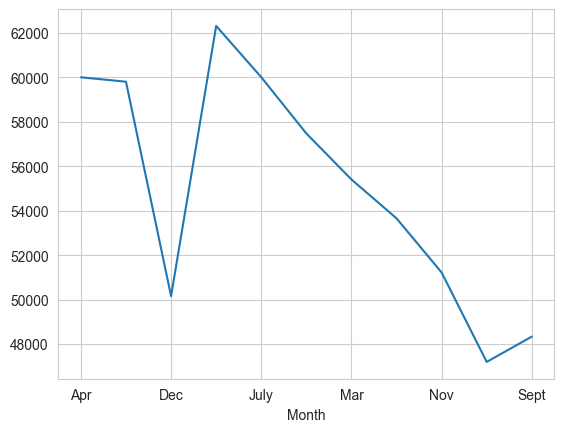

In [24]:
# Could be any column
byMonth['township'].plot()

### Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use applly along with the .date() method.

In [28]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

### Now groupby this Date column with the **.count()** aggregate and create a plot of counts of 911 calls.

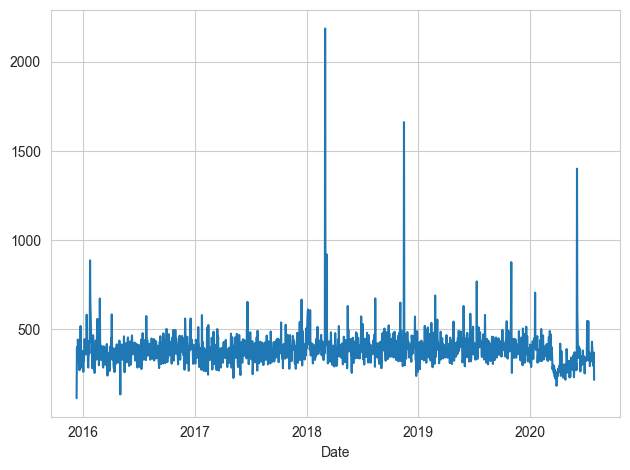

In [33]:
df.groupby('Date').count()['township'].plot()
plt.tight_layout()

### Now recreate this plot but create 3 separate plots with each plot representing a reason for the 911 calls.

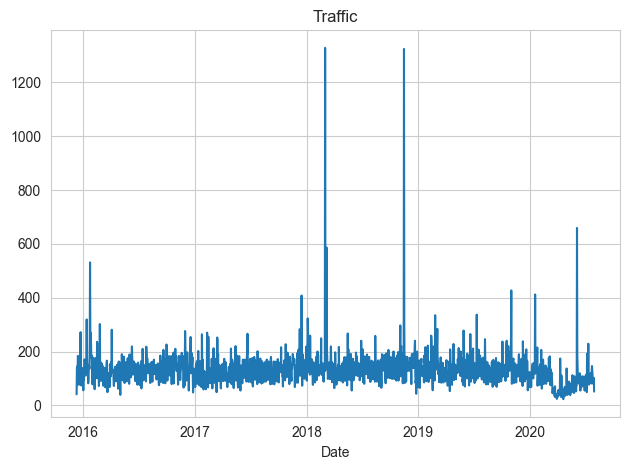

In [34]:
df[df['Reason'] == 'Traffic'].groupby('Date').count()['township'].plot()
plt.title('Traffic')
plt.tight_layout()

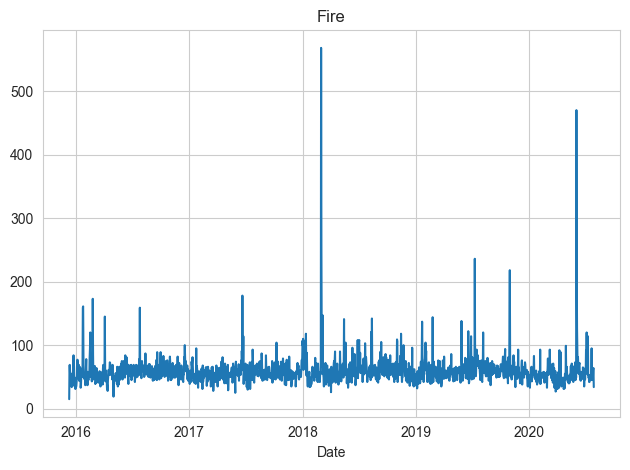

In [35]:
df[df['Reason'] == 'Fire'].groupby('Date').count()['township'].plot()
plt.title('Fire')
plt.tight_layout()

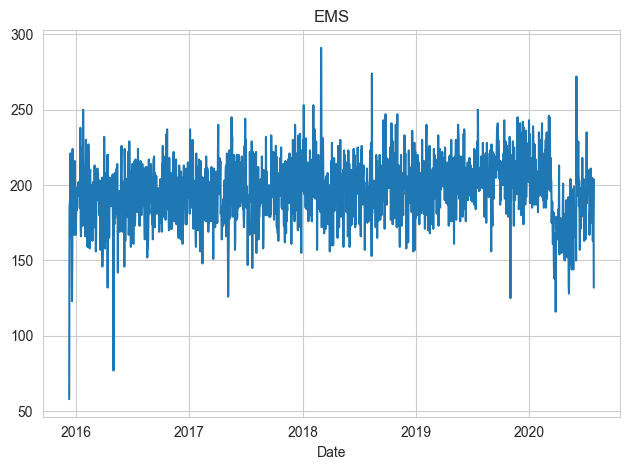

In [36]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['township'].plot()
plt.title('EMS')
plt.tight_layout()

### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [38]:
dayHour = df.groupby(by = ['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


### **Now create a HeatMap using this new Dataframe.**

<Axes: xlabel='Hour', ylabel='Day of Week'>

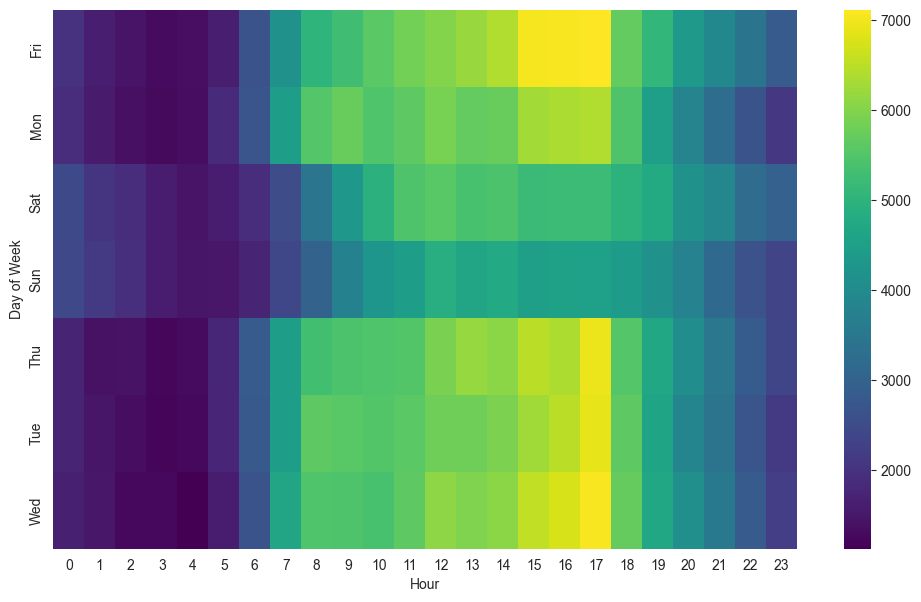

In [44]:
plt.figure(figsize = (12,7))
sns.heatmap(dayHour, cmap = 'viridis')

### **Now create a ClusterMap using this DataFrame.**

<Figure size 1200x700 with 0 Axes>

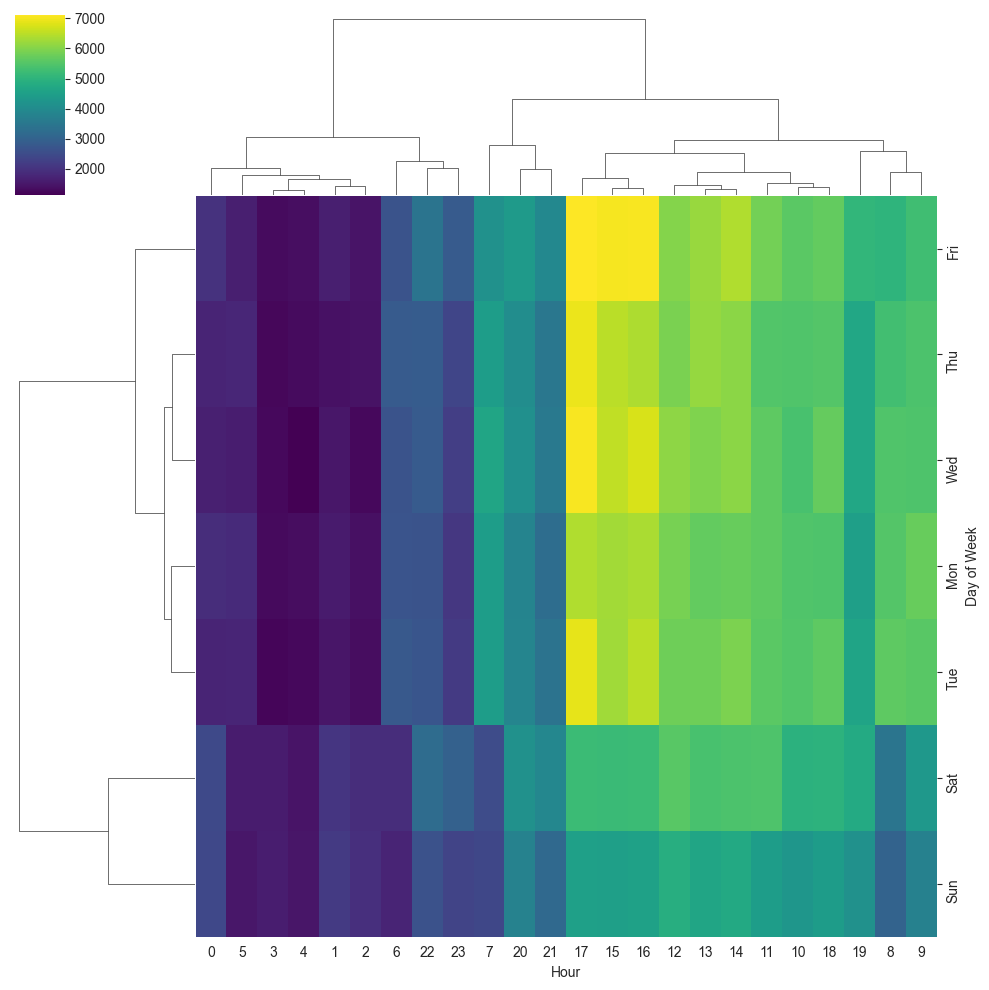

In [52]:
plt.figure(figsize = (12,7))
sns.clustermap(dayHour, cmap = 'viridis')

### **Now repeat these same plots and operation for a DataFrsme that shows the month as the column.**

In [54]:
dayMonth = df.groupby(by = ['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,Apr,Aug,Dec,Feb,July,Jun,Mar,May,Nov,Oct,Sept
Day of Week,,,,,,,,,,,
Fri,10941,8681,8379,9309,9207,8904,8255,7997,6934,7694,7336
Mon,8060,9499,6722,8896,8511,7881,8747,8410,8075,6598,6854
Sat,8050,7748,6773,8475,8198,7223,7593,7514,6609,6566,6111
Sun,6766,7859,5196,7478,6837,6694,6452,6865,6316,5956,5275
Thu,8849,8378,8358,9055,9489,8740,7997,7722,7482,6954,7508


<Axes: xlabel='Month', ylabel='Day of Week'>

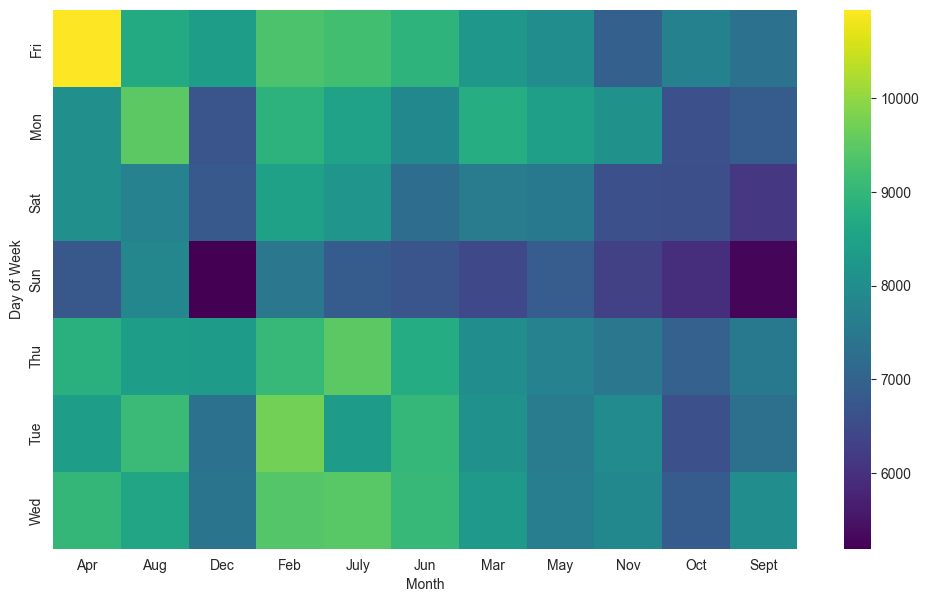

In [55]:
plt.figure(figsize = (12, 7))
sns.heatmap(dayMonth, cmap = 'viridis')

### **Now create another ClusterMap using this DataFrame.**

<Figure size 1200x700 with 0 Axes>

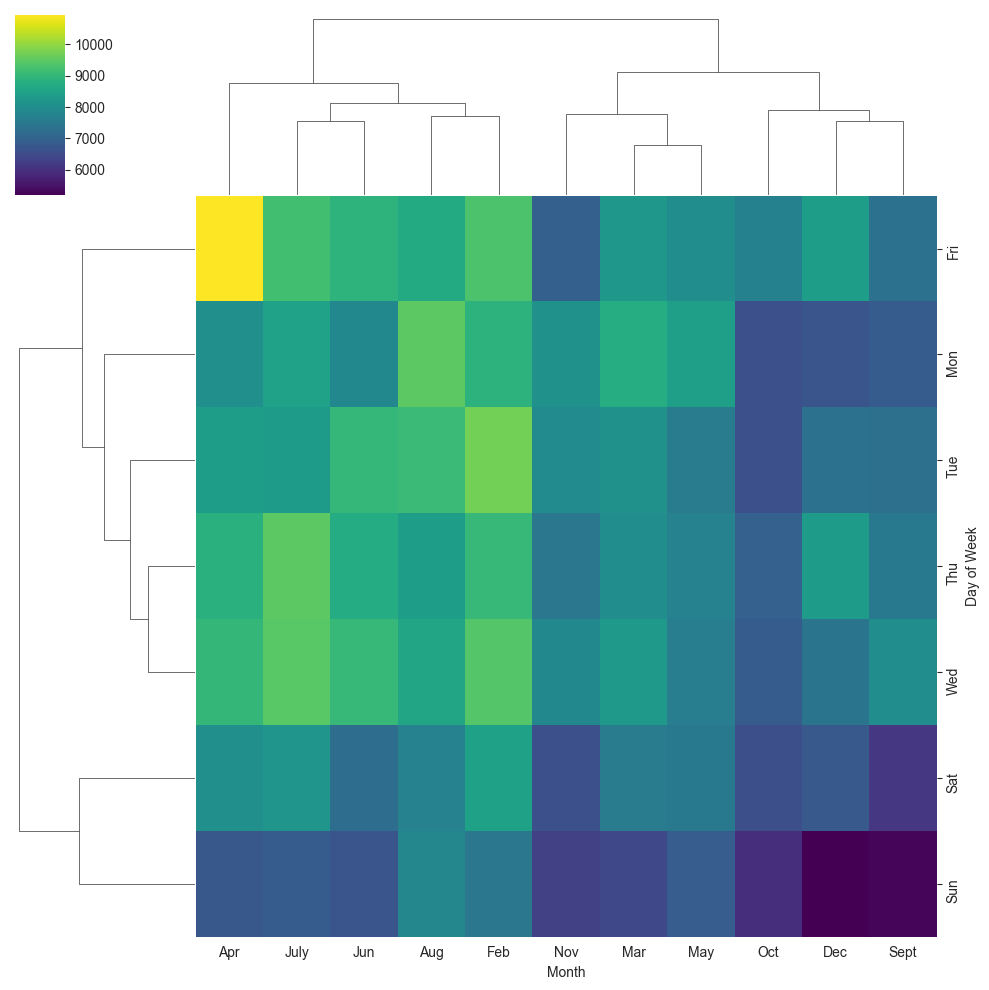

In [56]:
plt.figure(figsize = (12, 7))
sns.clustermap(dayMonth, cmap = 'viridis')

# [**Thank You**](#0)<br>